#### Phase 3: Project Submission

Student name: James Kimani

Student pace: Partime

Instructor name: Noah Kandie


### Business Problem

The goal of this analysis and model determine with water pumps are faulty and hence enable access to clean water accross Tanzania reliably. 


### Objective

The purpose of this analysis is to use classification modeling tecniques to accurately predict which water pumps are faulty and allow for stakeholders to repair/replace such and ensure consistent supply of clean water accross Tanzania.

### Data Understanding

The dataset used in this modelling is derived from https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/. 

The data contain information on water pumps recorded across the country of Tanzania. The Target variable is the status group of a pump given various characteristics of the pump including but not limited to Geographic location, Water quantity, GPS height location and Construction year among other features 

### Success Criteria

The objective is to obtain a prediction model that can correctly predict the condition of a water pump by 80% accuracy.

## 1. Importing Relevant Libraries

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
sns.set()

from IPython.display import display
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


## 2. Loading our data and Data Description

In [2]:
#Loading our data set into a pandas dataframes

df_1 = pd.read_csv('train_data.csv', header = 0)
df_2 = pd.read_csv('test_data.csv', header = 0)
df_3 = pd.read_csv('labels.csv')

# Combining both the train and test dataframes to one dataset, split to be done at the point of modeling
df = pd.concat([df_1, df_2])
# merging our labels into the dataset

df = pd.merge(df, df_3, on='id')

In [3]:
# Displaying the 1st 5 rows of our data
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,...,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,14/03/2011,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,...,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,06/03/2013,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,...,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,25/02/2013,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,...,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,28/01/2013,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,...,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,13/07/2011,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,...,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [4]:
#Checking the datatypes of our columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [5]:
# Descriptive Statistics, including for non-numerical columns in our train data
df.describe(include = "all")

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,...,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400.000000,59400.000000,59400,55765,59400.000000,55745,59400.000000,5.940000e+04,59400,59400.000000,59400,59029,59400,59400.000000,59400.000000,59400,59400,59400.000000,56066,59400,...,31234,56344,59400.000000,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,NaN,NaN,356,1897,NaN,2145,NaN,NaN,37400,NaN,9,19287,21,NaN,NaN,125,2092,NaN,2,1,...,2696,2,NaN,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3
top,NaN,NaN,15/03/2011,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,Lake Victoria,Madukani,Iringa,NaN,NaN,Njombe,Igosi,NaN,True,GeoData Consultants Ltd,...,K,True,NaN,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,10248,508,5294,NaN,NaN,2503,307,NaN,51011,59400,...,682,38852,NaN,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,NaN,NaN,NaN,15.297003,5.629747,NaN,NaN,179.909983,NaN,NaN,...,NaN,NaN,1300.652475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,NaN,NaN,NaN,17.587406,9.633649,NaN,NaN,471.482176,NaN,NaN,...,NaN,NaN,951.620547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,NaN,NaN,NaN,5.000000,2.000000,NaN,NaN,0.000000,NaN,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000,NaN,NaN,NaN,12.000000,3.000000,NaN,NaN,25.000000,NaN,NaN,...,NaN,NaN,1986.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000,NaN,NaN,NaN,17.000000,5.000000,NaN,NaN,215.000000,NaN,NaN,...,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum().sort_index()/len(df)

amount_tsh               0.000000
basin                    0.000000
construction_year        0.000000
date_recorded            0.000000
district_code            0.000000
extraction_type          0.000000
extraction_type_class    0.000000
extraction_type_group    0.000000
funder                   0.061195
gps_height               0.000000
id                       0.000000
installer                0.061532
latitude                 0.000000
lga                      0.000000
longitude                0.000000
management               0.000000
management_group         0.000000
num_private              0.000000
payment                  0.000000
payment_type             0.000000
permit                   0.051448
population               0.000000
public_meeting           0.056128
quality_group            0.000000
quantity                 0.000000
quantity_group           0.000000
recorded_by              0.000000
region                   0.000000
region_code              0.000000
scheme_managem

## 4. Data Preperation

### 4.1 Droping uneccessary columns

In [7]:
df['recorded_by'].unique()

array(['GeoData Consultants Ltd'], dtype=object)

In [8]:
# Drop the recorded_by column since the entry is consistent all through
df.drop(['recorded_by'], axis=1, inplace=True)

In [9]:
# Drop columns with a very high distinct count of unique values, to avoid high cadinality in our dataframe.
df.drop(['funder', 'installer', 'lga', 'scheme_name', 'subvillage', 'ward', 'wpt_name'], axis=1, inplace=True)

### 4.2. Working on columns with Missing Values

In [10]:
### Checking for missing values
df.isnull().sum()

id                          0
amount_tsh                  0
date_recorded               0
gps_height                  0
longitude                   0
latitude                    0
num_private                 0
basin                       0
region                      0
region_code                 0
district_code               0
population                  0
public_meeting           3334
scheme_management        3877
permit                   3056
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint_type_group       0
status_group                0
dtype: int

##### Working on public_meeting column

In [11]:
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [12]:
# We replace all the entries with nan with the mode, which is True
df['public_meeting'] = df['public_meeting'].fillna(False)

##### Working on scheme_management column

In [13]:
#Replacing the scheme_management column with the mode
df['scheme_management'].fillna(df['scheme_management'].mode()[0], inplace=True)


##### Working on Permit column

In [14]:
# Filling missing values in the permit column with the mode of the column 
df['permit'].fillna(df['permit'].mode()[0], inplace=True)
df['permit'].unique()

array([False,  True])

In [15]:
#checking if there are missing values
df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
gps_height               0
longitude                0
latitude                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
population               0
public_meeting           0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
status_group             0
dtype: int64

### 4.3 Feature Engineering

##### Working on data_recorded column

In [16]:
# Convert to date time data type
df['date_recorded'] = pd.to_datetime(df['date_recorded'], errors = 'coerce')

#Creating a column to of the month and year the record was taken

df['month_recorded'] =  df['date_recorded'].dt.month #extracting the month of recording
df['year_recorded'] =  df['date_recorded'].dt.year # extracting the year of recording
df['date_recorded'] =  df['date_recorded'].dt.day # extracting the day of recording

# Create a column for the season when the record was made, either dry or wet based on the seasons experienced in Tanzania
# Wet Months = March,April,May,October,November December
# Dry Months = January, February, June, July, August, September 
wet_months = [3, 4, 5, 10, 11, 12]
dry_months = [1, 2, 6, 7, 8, 9]

# Create a new column for the season
df['season_recorded'] = df['month_recorded'].apply(lambda x: 'Wet' if x in wet_months else 'Dry' if x in dry_months else 'Unknown')
df['season_recorded'].unique()

# Drop the date_recorded column as it is nolonger as useful
df.drop(['date_recorded'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   gps_height             59400 non-null  int64  
 3   longitude              59400 non-null  float64
 4   latitude               59400 non-null  float64
 5   num_private            59400 non-null  int64  
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   region_code            59400 non-null  int64  
 9   district_code          59400 non-null  int64  
 10  population             59400 non-null  int64  
 11  public_meeting         59400 non-null  bool   
 12  scheme_management      59400 non-null  object 
 13  permit                 59400 non-null  bool   
 14  construction_year      59400 non-null  int64  
 15  ex

##### Working on the district_code column

In [18]:
df['district_code'].unique()

array([ 5,  2,  4, 63,  1,  8,  3,  6, 43,  7, 23, 33, 53, 62, 60, 30, 13,
        0, 80, 67], dtype=int64)

In [19]:
# Checking the number of rows where the district is  0
count_0 = (df['district_code'] == 0).sum()
count_0

23

In [20]:
df['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

In [21]:
#Replacing the rows where the district code with 1 where the entry is 0
df['district_code'] = df['district_code'].replace(0,1)
df['district_code'].unique()

array([ 5,  2,  4, 63,  1,  8,  3,  6, 43,  7, 23, 33, 53, 62, 60, 30, 13,
       80, 67], dtype=int64)

##### Status_group column

In [22]:
df['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [23]:
### Replacing the categories functional', 'non functional', 'functional needs repair' with 0,1,2 respectively

df['status_group'] = df['status_group'].replace({
    'functional': 0,
    'non functional': 1,
    'functional needs repair': 2
})
df['status_group'].unique()


array([0, 1, 2], dtype=int64)

##### Working on the contruction_year column

In [24]:
## we impute the longitude where it has been recorded as 0 with the median construction year per district then per region
df['construction_year'] = df.groupby('district_code')['construction_year'].apply(lambda x: x.replace(0,int(x.median())))
df['construction_year'] = df.groupby('region')['construction_year'].apply(lambda x: x.replace(0, int(x.median())))
df['construction_year'].value_counts()

1990    7931
1985    5500
1984    3849
1982    3659
1988    3445
2010    2645
2008    2616
2009    2533
2000    2106
2007    1587
2006    1586
2003    1298
2011    1256
2004    1123
2012    1084
2002    1075
1978    1037
1995    1029
2005    1011
1999     981
1998     967
1996     811
1980     811
1994     738
1972     708
1974     676
1997     658
1992     640
1993     608
2001     540
1983     488
1986     477
1975     437
1976     414
1970     411
1989     364
1991     324
1987     302
1981     238
1977     202
1979     192
1973     184
2013     176
1971     145
1960     102
1967      88
1963      85
1968      77
1969      59
1964      40
1962      30
1961      21
1965      19
1966      17
Name: construction_year, dtype: int64

##### Working on the gps_height column

In [25]:
## we impute the gps_height where it has been recorded as 0 with the mean construction year per district then per region
df['gps_height'] = df.groupby('district_code')['construction_year'].apply(lambda x: x.replace(0, x.mean()))
df['gps_height'] = df.groupby('region')['construction_year'].apply(lambda x: x.replace(0, x.mean()))
df['gps_height'].value_counts()

1990    7931
1985    5500
1984    3849
1982    3659
1988    3445
2010    2645
2008    2616
2009    2533
2000    2106
2007    1587
2006    1586
2003    1298
2011    1256
2004    1123
2012    1084
2002    1075
1978    1037
1995    1029
2005    1011
1999     981
1998     967
1996     811
1980     811
1994     738
1972     708
1974     676
1997     658
1992     640
1993     608
2001     540
1983     488
1986     477
1975     437
1976     414
1970     411
1989     364
1991     324
1987     302
1981     238
1977     202
1979     192
1973     184
2013     176
1971     145
1960     102
1967      88
1963      85
1968      77
1969      59
1964      40
1962      30
1961      21
1965      19
1966      17
Name: gps_height, dtype: int64

##### Working on the longitude column

In [26]:
## we impute the longitude where it has been recorded as 0 with the median construction year per district then per region
df['longitude'] = df.groupby('district_code')['construction_year'].apply(lambda x: x.replace(0, x.median()))
df['longitude'] = df.groupby('region')['construction_year'].apply(lambda x: x.replace(0, x.median()))
df['longitude'].value_counts()

1990    7931
1985    5500
1984    3849
1982    3659
1988    3445
2010    2645
2008    2616
2009    2533
2000    2106
2007    1587
2006    1586
2003    1298
2011    1256
2004    1123
2012    1084
2002    1075
1978    1037
1995    1029
2005    1011
1999     981
1998     967
1996     811
1980     811
1994     738
1972     708
1974     676
1997     658
1992     640
1993     608
2001     540
1983     488
1986     477
1975     437
1976     414
1970     411
1989     364
1991     324
1987     302
1981     238
1977     202
1979     192
1973     184
2013     176
1971     145
1960     102
1967      88
1963      85
1968      77
1969      59
1964      40
1962      30
1961      21
1965      19
1966      17
Name: longitude, dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   gps_height             59400 non-null  int64  
 3   longitude              59400 non-null  int64  
 4   latitude               59400 non-null  float64
 5   num_private            59400 non-null  int64  
 6   basin                  59400 non-null  object 
 7   region                 59400 non-null  object 
 8   region_code            59400 non-null  int64  
 9   district_code          59400 non-null  int64  
 10  population             59400 non-null  int64  
 11  public_meeting         59400 non-null  bool   
 12  scheme_management      59400 non-null  object 
 13  permit                 59400 non-null  bool   
 14  construction_year      59400 non-null  int64  
 15  ex

## 5. Data Visualization

In [28]:
df.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'basin', 'region', 'region_code', 'district_code',
       'population', 'public_meeting', 'scheme_management', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group',
       'month_recorded', 'year_recorded', 'season_recorded'],
      dtype='object')

In [29]:
# Correlation of the target and features of our dataset
df.corr()['status_group'].sort_values(ascending = False)


status_group         1.000000
region_code          0.083590
year_recorded        0.043088
district_code        0.034005
latitude             0.021020
month_recorded       0.009637
id                   0.003354
num_private         -0.006159
population          -0.015198
permit              -0.029597
amount_tsh          -0.043533
public_meeting      -0.053355
construction_year   -0.187401
longitude           -0.187401
gps_height          -0.187401
Name: status_group, dtype: float64

### Correlation Matrix (Heatmap)

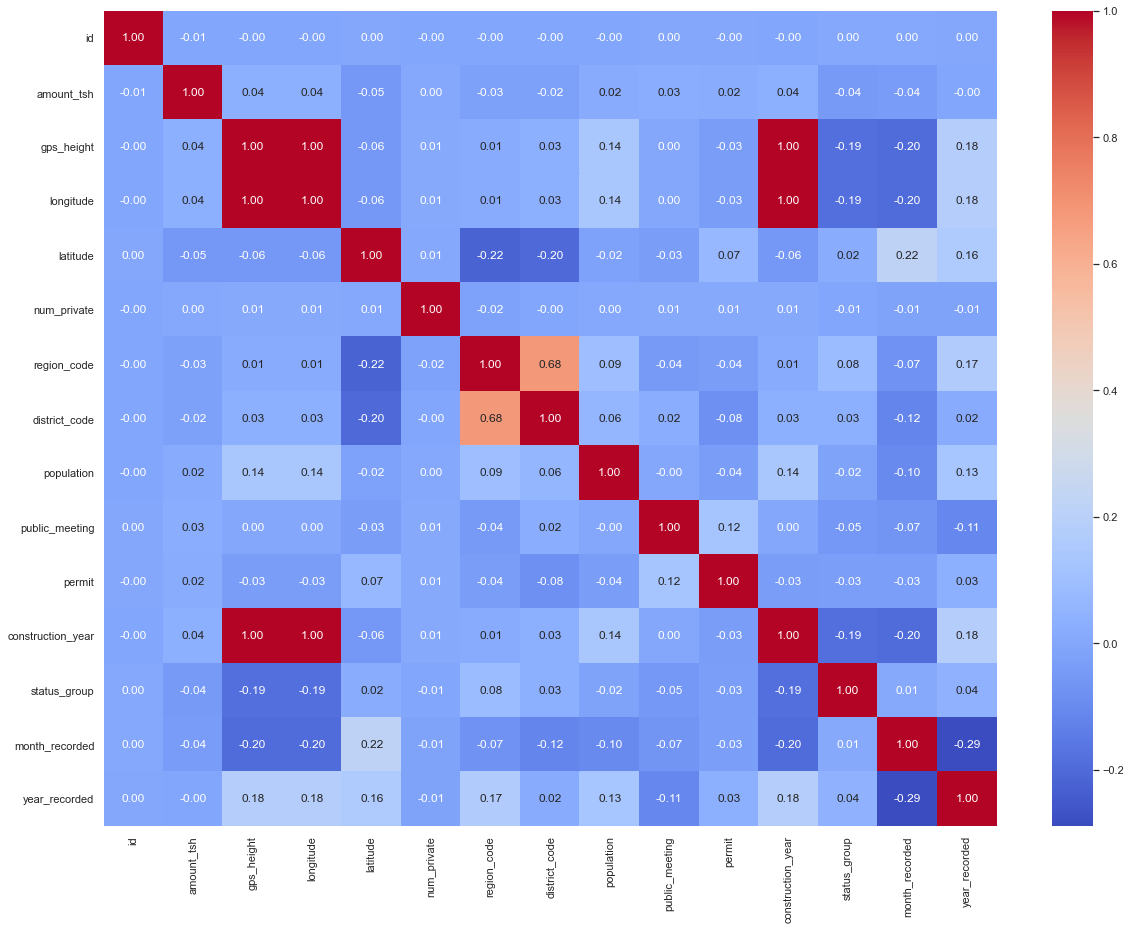

In [30]:
#correlation heatmap of numerical features
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot = True,cmap='coolwarm', fmt=".2f");

Despite the low correlation among the features and target, the gps_height and region have the highest correlation, We also observe a strong correlation between region_code and district_code.

In [31]:
#we drop the region_code column due to the possiblity of high multicoliniariy with the district_code column
df.drop(['region_code'], axis=1, inplace=True)

###  Distribution of amount_tsh

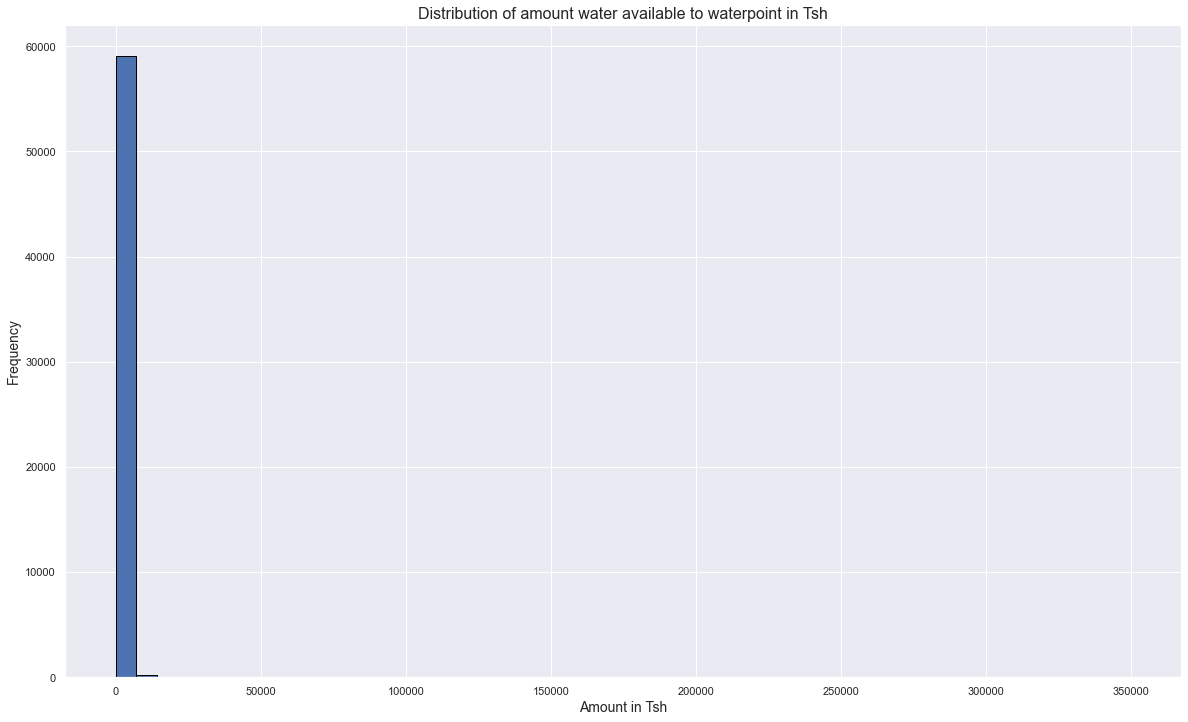

In [32]:
plt.figure(figsize=(20, 12))
plt.hist(df['amount_tsh'], bins = 50, edgecolor =  'black')
plt.title('Distribution of amount water available to waterpoint in Tsh', fontsize = 16)
plt.xlabel('Amount in Tsh', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.show;

The Distribution of amount water available to waterpoint in Tsh is negatively skewed.

In [33]:
df['status_group'].value_counts()

0    32259
1    22824
2     4317
Name: status_group, dtype: int64

###  Distribution of status group

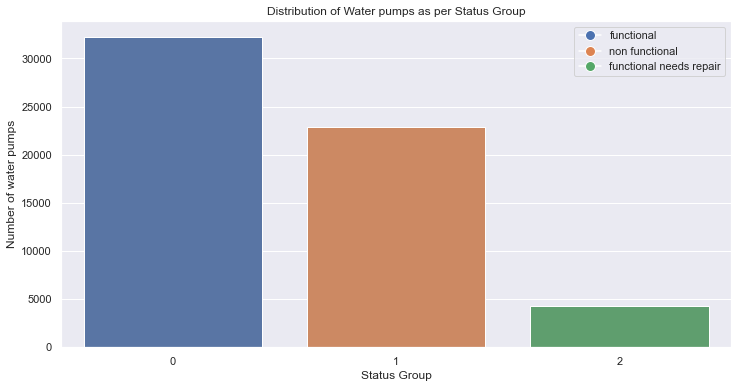

In [34]:
key = {
    'functional': 0,
    'non functional': 1,
    'functional needs repair': 2
}
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='status_group')


plt.xlabel('Status Group')
plt.ylabel('Number of water pumps')

plt.title('Distribution of Water pumps as per Status Group')
legend_labels = list(key.keys())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label = label, 
                             markerfacecolor=sns.color_palette()[key[label]], markersize=10) for label in legend_labels]
plt.legend(handles=legend_handles, labels=legend_labels, loc='upper right')

plt.show();


### Distribution of water pumps among districts

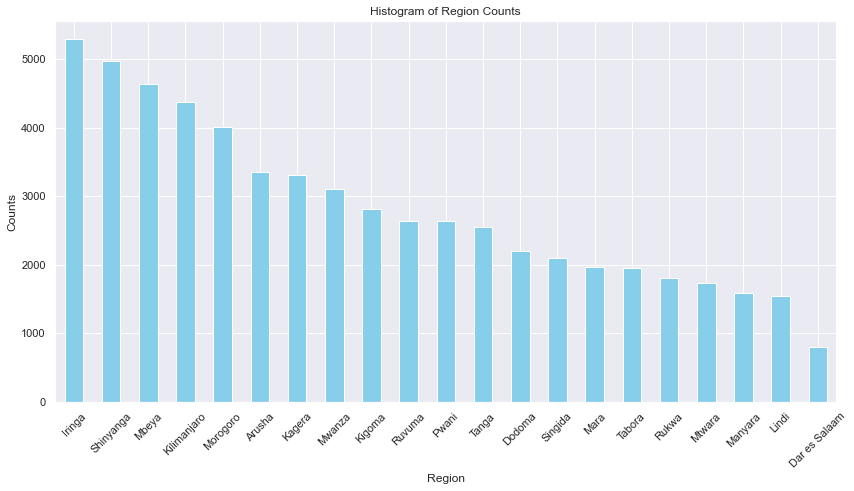

In [35]:
df_region = df['region'].value_counts()

plt.figure(figsize=(14, 7))
df_region.plot(kind='bar', color='skyblue')
plt.title('Histogram of Region Counts')
plt.xlabel('Region')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show();

###  Distribution of water pump status based on the region

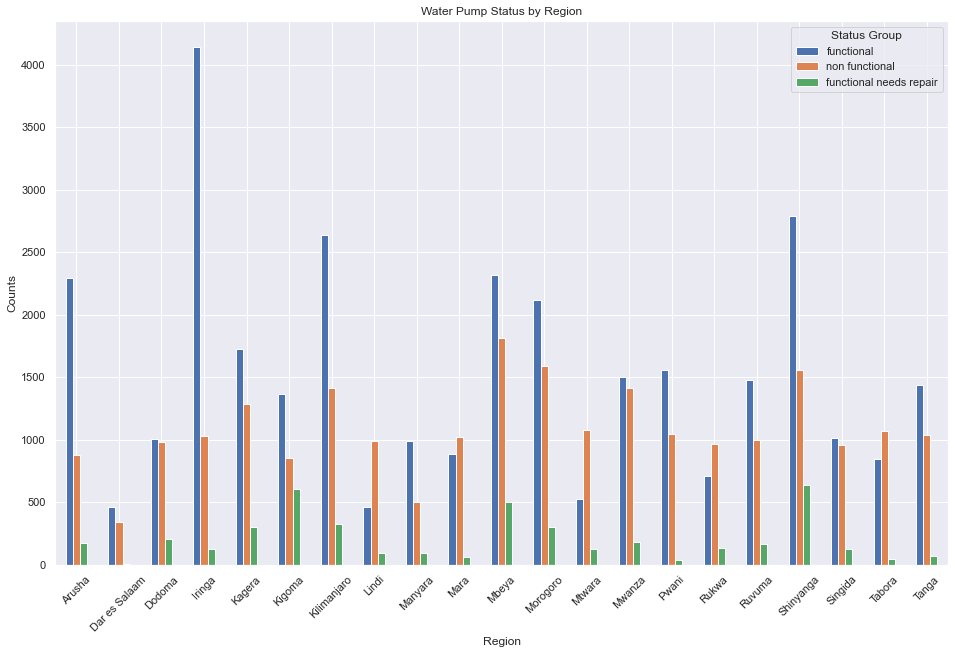

In [36]:
# Group by 'region' and 'status_group', then count occurrences
df_grouped = df.groupby(['region', 'status_group']).size().unstack(fill_value=0)

# Renaming the columns of our grouped df
df_grouped = df_grouped.rename(columns={
    0: 'functional',
    1: 'non functional',
    2:'functional needs repair'
})
# Plotting the grouped barchart
df_grouped.plot(kind='bar', figsize=(16, 10), stacked=False)
plt.title('Water Pump Status by Region')
plt.xlabel('Region')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Status Group')
plt.show()


### Distribution of water quality

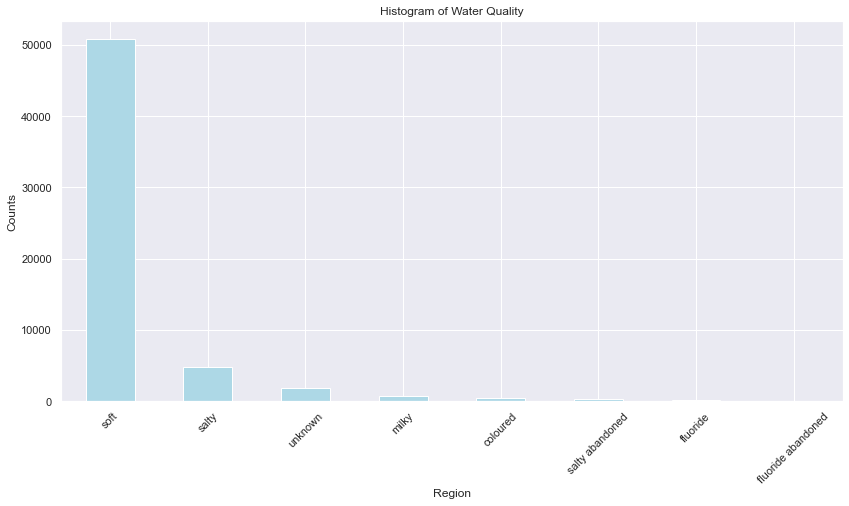

In [37]:
df_water_quality = df['water_quality'].value_counts()

plt.figure(figsize=(14, 7))
df_water_quality.plot(kind='bar', color='lightblue')
plt.title('Histogram of Water Quality')
plt.xlabel('Region')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show();

### Distribution of Pump status and Water Quality Group

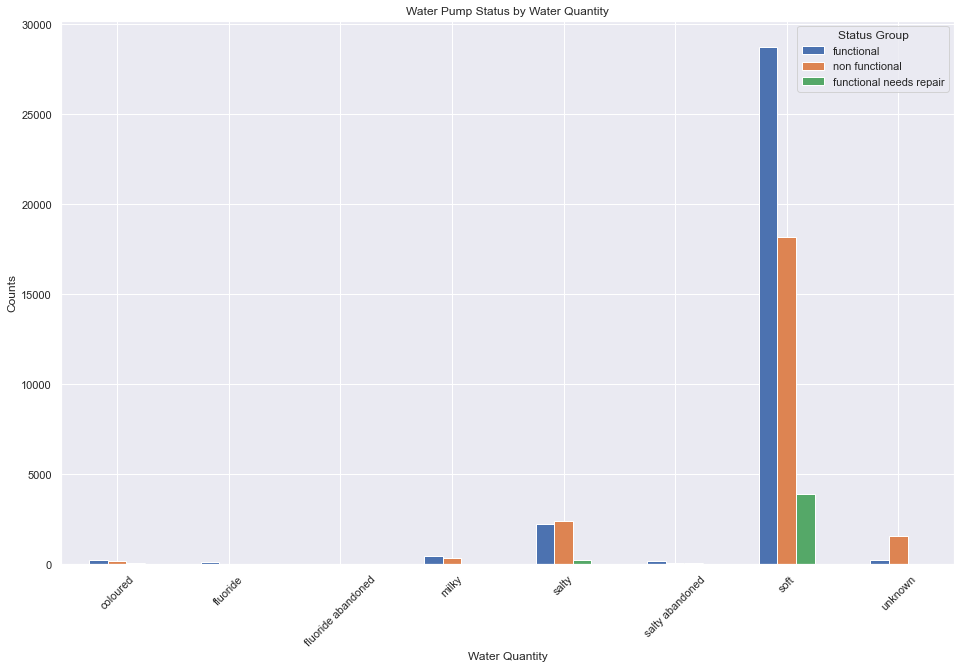

In [38]:
# Group by 'water quantity' and 'status_group', then count occurrences
df_grouped = df.groupby(['water_quality', 'status_group']).size().unstack(fill_value=0)

# Renaming the columns of our grouped df
df_grouped = df_grouped.rename(columns={
    0: 'functional',
    1: 'non functional',
    2:'functional needs repair'
})
# Plotting the grouped barchart
df_grouped.plot(kind='bar', figsize=(16, 10), stacked=False)
plt.title('Water Pump Status by Water Quantity')
plt.xlabel('Water Quantity')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Status Group')
plt.show()

### Distribution of Pump status and Water Quantity Group

In [39]:
df['quantity_group'].unique()

array(['enough', 'insufficient', 'dry', 'seasonal', 'unknown'],
      dtype=object)

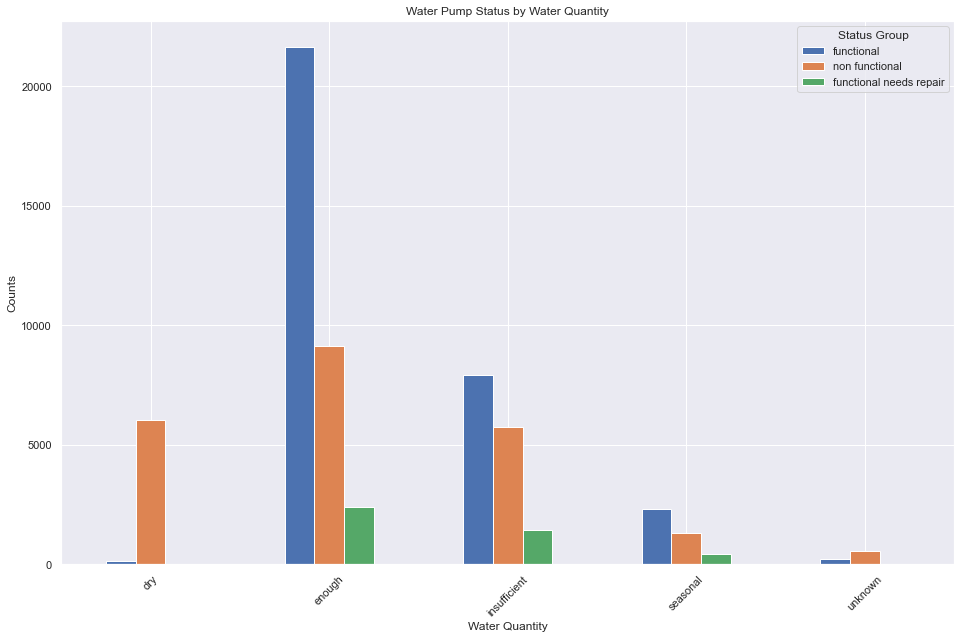

In [40]:
# Group by 'water quantity' and 'status_group', then count occurrences
df_grouped = df.groupby(['quantity_group', 'status_group']).size().unstack(fill_value=0)

# Renaming the columns of our grouped df
df_grouped = df_grouped.rename(columns={
    0: 'functional',
    1: 'non functional',
    2:'functional needs repair'
})
# Plotting the grouped barchart
df_grouped.plot(kind='bar', figsize=(16, 10), stacked=False)
plt.title('Water Pump Status by Water Quantity')
plt.xlabel('Water Quantity')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Status Group')
plt.show()


## 6. Data Modeling

In [41]:
# Creating dummy variables for our categorical variables

cols = df.select_dtypes(exclude=[np.number])
list(cols)

['basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'season_recorded']

In [42]:
#Creating Dummy variables for our categorical data

columns_create_dummies = ['basin',
 'region',
 'public_meeting',
 'scheme_management',
 'permit',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment',
 'payment_type',
 'water_quality',
 'quality_group',
 'quantity',
 'quantity_group',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type',
 'waterpoint_type_group',
 'season_recorded']

for column in columns_create_dummies:
    df = pd.get_dummies(df, columns=[column], drop_first=True)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Columns: 164 entries, id to season_recorded_Wet
dtypes: float64(2), int64(10), uint8(152)
memory usage: 17.0 MB


### Simple Linear Regression

In [43]:
#Defining our target and feature variables
y = df['status_group']
X = df['gps_height'] 

# Create an OLS model
lin_model = sm.OLS(endog = y, exog = sm.add_constant(X))
results = lin_model.fit()

In [44]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           status_group   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     2162.
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        00:12:00   Log-Likelihood:                -55596.
No. Observations:               59400   AIC:                         1.112e+05
Df Residuals:                   59398   BIC:                         1.112e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.2297      0.445     47.685      0.000      20.357      22.102
gps_height    -0.0104      0.000    -46.497      0.000      -0.011      -0.010
==============================================================================
Omnibus:                     5033.785   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6364.312
Skew:                           0.796   Prob(JB):                         0.00
Kurtosis:                       2.810   Cond. No.                     3.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
df.columns

Index(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'district_code', 'population', 'construction_year',
       'status_group',
       ...
       'waterpoint_type_dam', 'waterpoint_type_hand pump',
       'waterpoint_type_improved spring', 'waterpoint_type_other',
       'waterpoint_type_group_communal standpipe', 'waterpoint_type_group_dam',
       'waterpoint_type_group_hand pump',
       'waterpoint_type_group_improved spring', 'waterpoint_type_group_other',
       'season_recorded_Wet'],
      dtype='object', length=164)

### Multiple Linear Regression

#### Defining our target and feature variables

In [46]:
X = df.drop(columns = ['id', 'status_group'])
y = df['status_group']

#### Creating our train and test dataframes

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Scaling the numerical features

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Create an OLS model
lin_model = sm.OLS(endog = y, exog = sm.add_constant(X))
results = lin_model.fit()

#Printing a summary of our results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           status_group   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     139.2
Date:                Thu, 23 May 2024   Prob (F-statistic):               0.00
Time:                        00:16:24   Log-Likelihood:                -49837.
No. Observations:               59400   AIC:                         9.990e+04
Df Residuals:                   59289   BIC:                         1.009e+05
Df Model:                         110                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

#### Observations.
The Feature variables only explain 20% in the variability of our target variable
Further analysis is required to enable us increase the predictive power of our model, using classification models

## 7. Classification Analysis

### Logistic Regression

In [52]:
# Model training
model = LogisticRegression(max_iter=100, tol=1e-4, solver='sag', random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.90      0.80      6457
           1       0.79      0.64      0.71      4572
           2       0.49      0.07      0.12       851

    accuracy                           0.74     11880
   macro avg       0.66      0.53      0.54     11880
weighted avg       0.73      0.74      0.71     11880

[[5781  642   34]
 [1625 2921   26]
 [ 645  149   57]]


C:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


##### Observations
Our Logistic Regression perfoms with weighted precision of only 0.73 and an accuracy of 74%

### Gradient Boosting Model

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

# Model training and fitting
model = GradientBoostingClassifier(max_depth=8,random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.91      0.84      6457
           1       0.85      0.74      0.79      4572
           2       0.60      0.30      0.40       851

    accuracy                           0.80     11880
   macro avg       0.74      0.65      0.68     11880
weighted avg       0.80      0.80      0.79     11880

[[5864  476  117]
 [1121 3396   55]
 [ 465  130  256]]


##### Observations
Our Gradient boosting model gives us a weighted precision 0.8 and an accuracy of 80%
The model performs well

### Decision Tree Model

In [54]:
from sklearn.tree import DecisionTreeClassifier

# Model training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      0.79      0.80      6457
           1       0.76      0.76      0.76      4572
           2       0.36      0.38      0.37       851

    accuracy                           0.75     11880
   macro avg       0.64      0.64      0.64     11880
weighted avg       0.75      0.75      0.75     11880

[[5111  963  383]
 [ 904 3482  186]
 [ 372  155  324]]


##### Observations
Our Decision Tree model gives us a weighted precision 0.75 and an accuracy of 75%


###  Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestClassifier

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.84      0.82      6457
           1       0.80      0.78      0.79      4572
           2       0.44      0.36      0.39       851

    accuracy                           0.78     11880
   macro avg       0.68      0.66      0.67     11880
weighted avg       0.78      0.78      0.78     11880

[[5439  748  270]
 [ 889 3559  124]
 [ 401  144  306]]


##### Observations
Our Random Forest model gives us a weighted precision 0.78 and an accuracy of 78%
The model performs well

### K-Nearest Neighbors

In [56]:
from sklearn.neighbors import KNeighborsClassifier

# Model training
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.77      0.86      0.81      6457
           1       0.79      0.73      0.76      4572
           2       0.50      0.29      0.37       851

    accuracy                           0.77     11880
   macro avg       0.69      0.63      0.65     11880
weighted avg       0.76      0.77      0.76     11880

[[5533  758  166]
 [1160 3335   77]
 [ 455  150  246]]


##### Observations
Our K-nearest Neighbors model gives us a weighted precision 0.71 and an accuracy of 72%


### AdaBoost

In [57]:
from sklearn.ensemble import GradientBoostingClassifier

# Create and fit the Gradient Boosting model
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Model evaluation
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.72      0.92      0.81      6457
           1       0.83      0.62      0.71      4572
           2       0.54      0.13      0.21       851

    accuracy                           0.75     11880
   macro avg       0.70      0.56      0.58     11880
weighted avg       0.75      0.75      0.73     11880

[[5968  439   50]
 [1688 2842   42]
 [ 605  138  108]]


##### Observations
Our Adaboost model gives us a weighted precision 0.75 and an accuracy of 75%


## 8.  Model Evaluation

Overall, The best perfoming classsication model is the Gradient Boosting Model with an accurancy of 80%. 
Further, the random forest model performed well with an accuracy of 78%

## 9. Conclusion

Using the Gradient Bosting Model, We can accuraly predict 80% if a water pump needs repair